In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Defining Problem Statement

In the rapidly evolving banking sector, customer retention has become a critical concern. Banks are increasingly seeking to understand the factors that influence customer decisions to stay with or leave their banking service provider. This project focuses on analyzing a dataset containing various attributes of bank customers to identify key predictors of customer churn. By leveraging data analytics, we aim to uncover patterns and insights that could help devise strategies to enhance customer retention and reduce churn rates.

# Analysing basic metrics

In [3]:
# Load the dataset
df = pd.read_csv('Bank-Records.csv')

In [5]:
# Display the first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
# Display shape of the dataset
df.shape

(10000, 18)

In [6]:
# Display summary statistics of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

# Data Cleaning

Next, we will clean the data by checking for missing values and handling any inconsistencies.

In [10]:
# Check for missing values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [11]:
# Handle any missing values if found (for example, by filling with mean/median or dropping rows)
df.dropna(inplace=True)

# 1. Descriptive Statistics

We will calculate basic statistics for numerical columns to understand the central tendency and distribution.

- <b> Basic Statistics:</b> Calculate mean, median, and mode for numerical columns like CreditScore, Age, Balance, NumOfProducts, EstimatedSalary, and Points Earned.

In [12]:
# Calculate mean, median, and mode for numerical columns
numerical_columns = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']
for col in numerical_columns:
    print(f'{col}: Mean = {df[col].mean()}, Median = {df[col].median()}, Mode = {df[col].mode()[0]}')

CreditScore: Mean = 650.5288, Median = 652.0, Mode = 850
Age: Mean = 38.9218, Median = 37.0, Mode = 37
Balance: Mean = 76485.889288, Median = 97198.54000000001, Mode = 0.0
NumOfProducts: Mean = 1.5302, Median = 1.0, Mode = 1
EstimatedSalary: Mean = 100090.239881, Median = 100193.915, Mode = 24924.92
Point Earned: Mean = 606.5151, Median = 605.0, Mode = 408


- <b>Distribution Analysis:</b> Analyze the distribution of key numerical variables using histograms and box plots to understand the spread and central tendency.

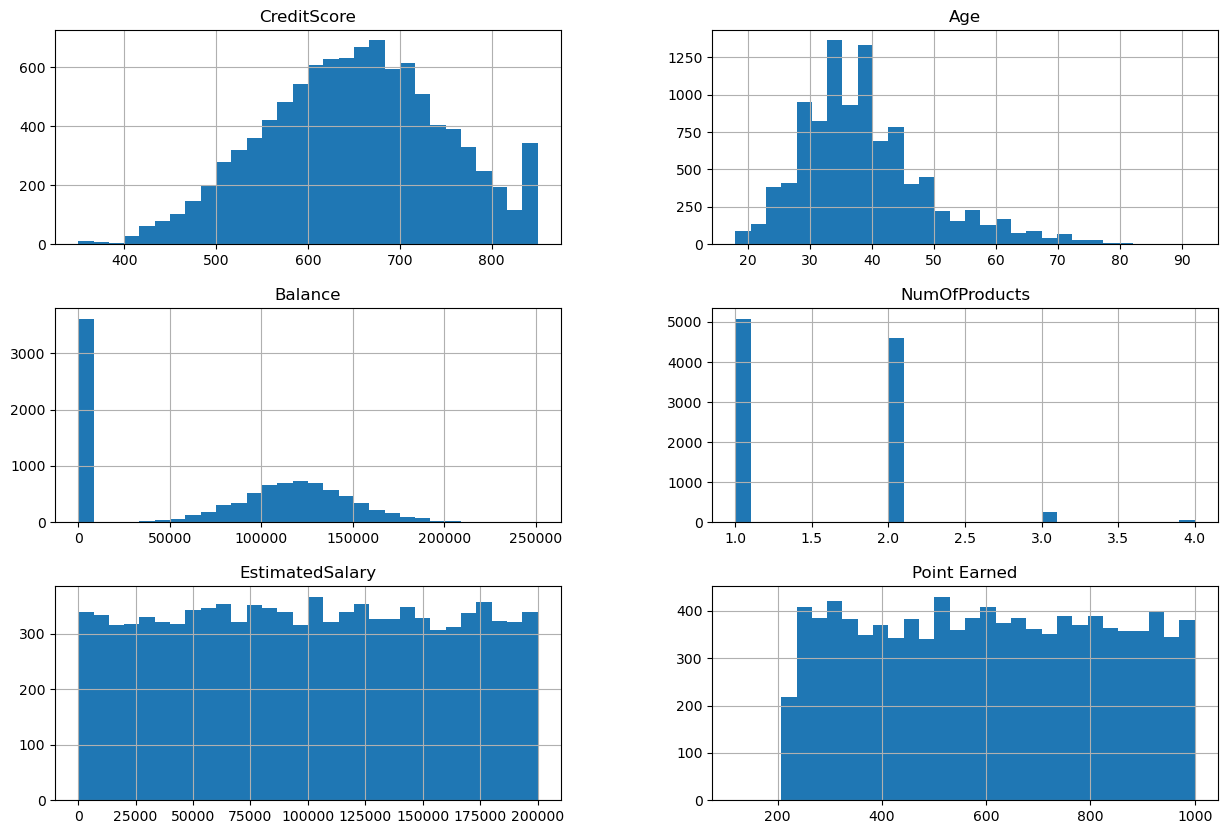

In [13]:
# Plot histograms for numerical columns
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.show()

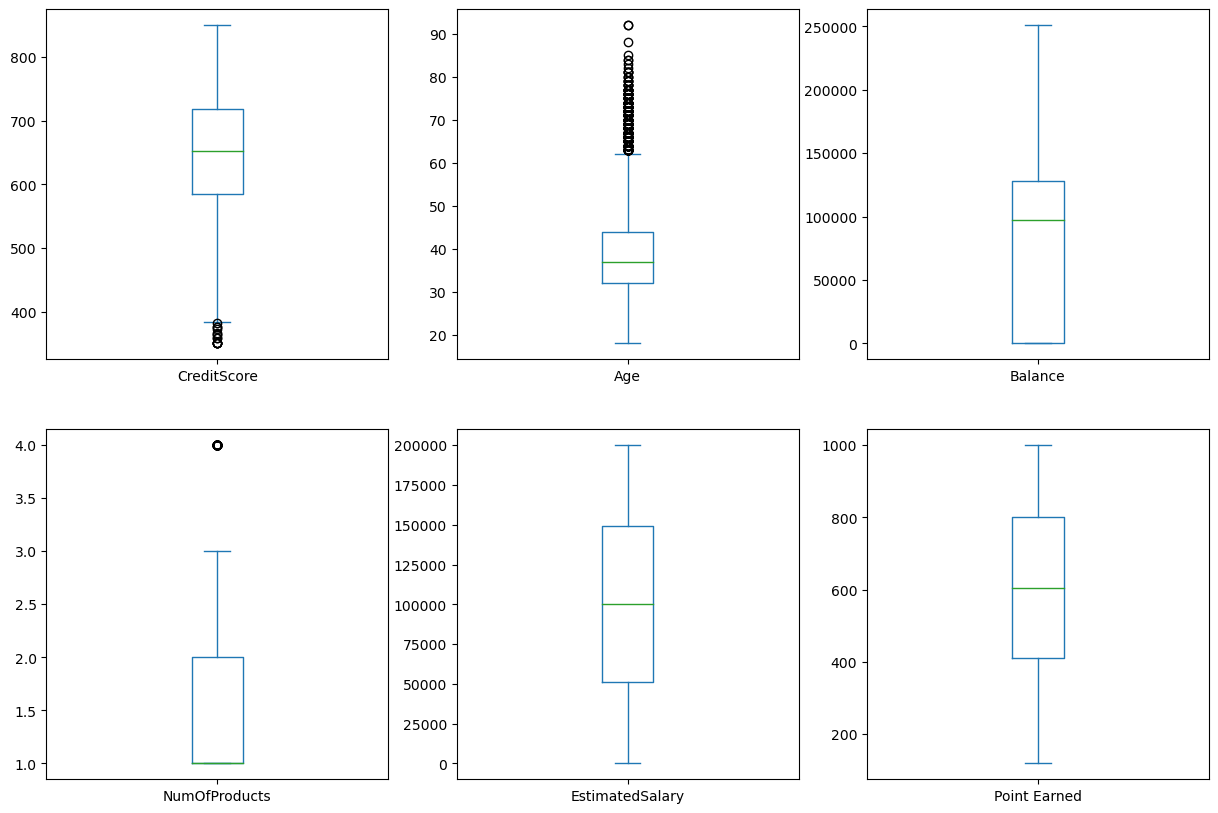

In [14]:
# Plot box plots for numerical columns
df[numerical_columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

# 2. Exploratory Data Analysis (EDA)

Perform EDA to find correlations and visualize relationships between features.

- <b> Correlation Analysis: </b> Explore the correlation between numerical features and the Exited variable to identify potential predictors of churn.

In [17]:
# Correlation matrix

# Select only the numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Display the correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


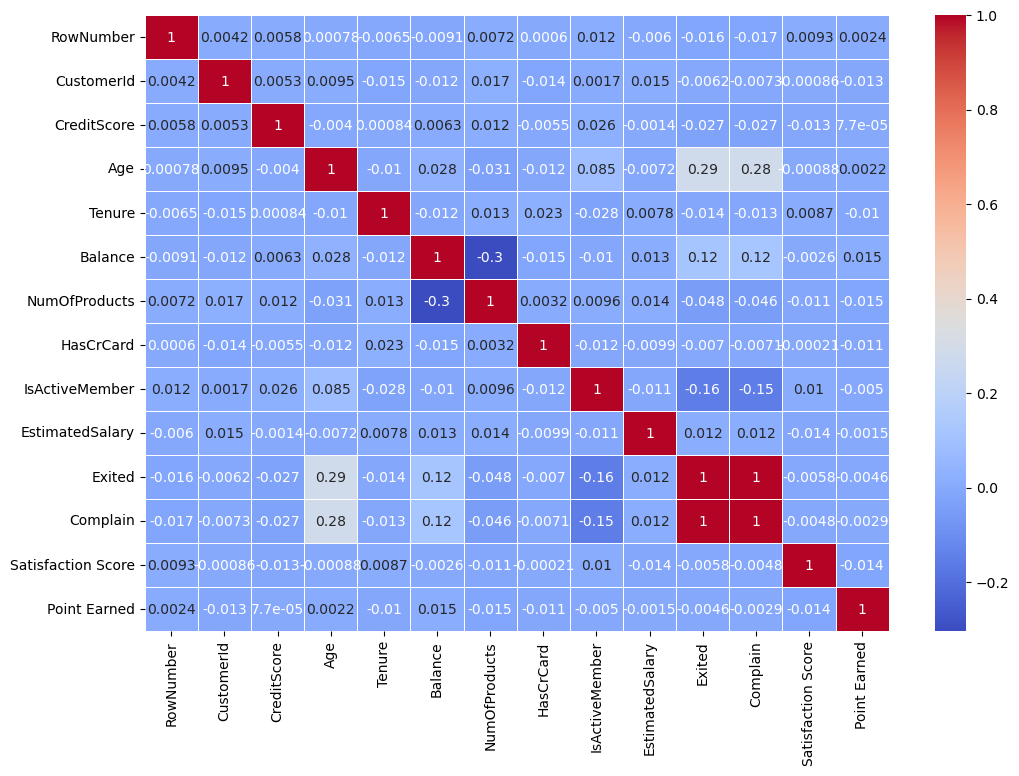

In [18]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

- <b> Customer Profile Analysis:</b> Segment customers based on key demographics (Age, Geography, Gender) to identify which groups are more likely to churn.

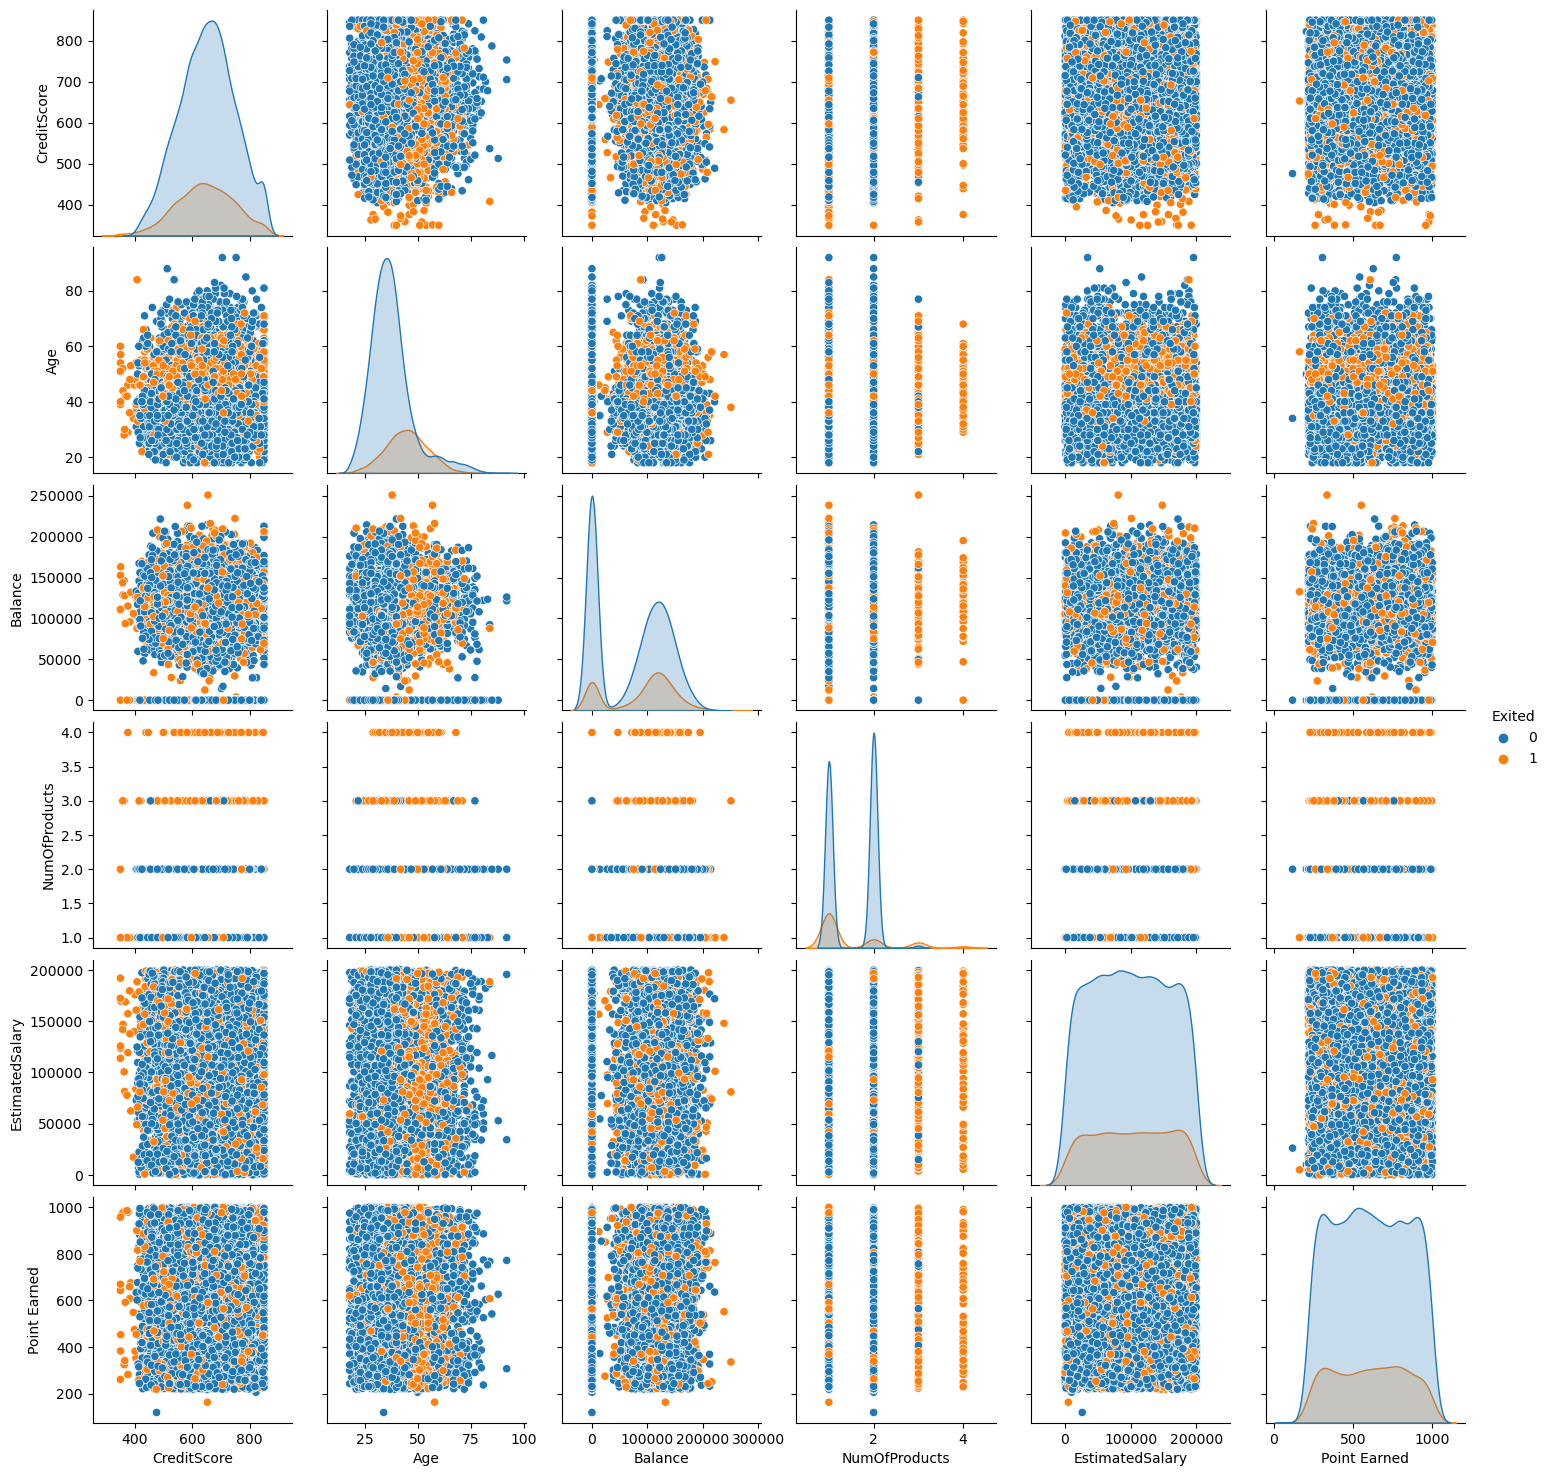

In [22]:
# Pair plot for selected features
selected_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Exited']
sns.pairplot(df[selected_features], hue='Exited')
plt.show()

# 3. Comparative Analysis

Analyze churn rates by different categories like geography and gender.

- <b> Churn by Geography:</b> Compare churn rates across different geographical locations to see if certain regions have higher churn rates.

In [23]:
# Churn by Geography
geo_churn = df.groupby('Geography')['Exited'].mean()
geo_churn

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

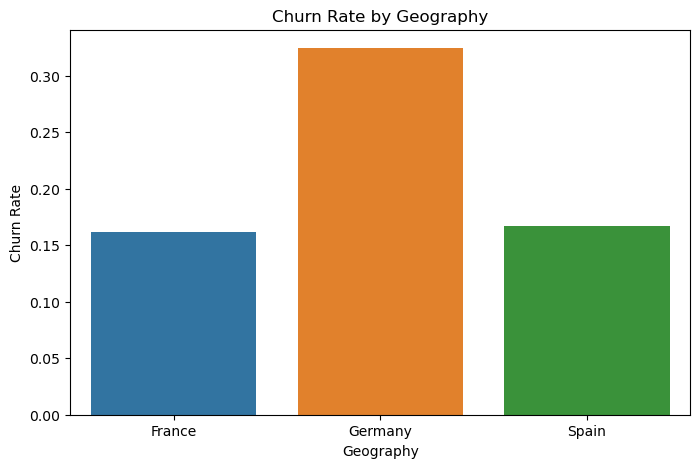

In [24]:
# Bar plot for churn by Geography
plt.figure(figsize=(8, 5))
sns.barplot(x=geo_churn.index, y=geo_churn.values)
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.xlabel('Geography')
plt.show()

- <b> Gender Differences in Churn:</b> Analyze churn rates between different genders to explore if gender plays a significant role in churn.

In [25]:
# Gender Differences in Churn
gender_churn = df.groupby('Gender')['Exited'].mean()
gender_churn

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64

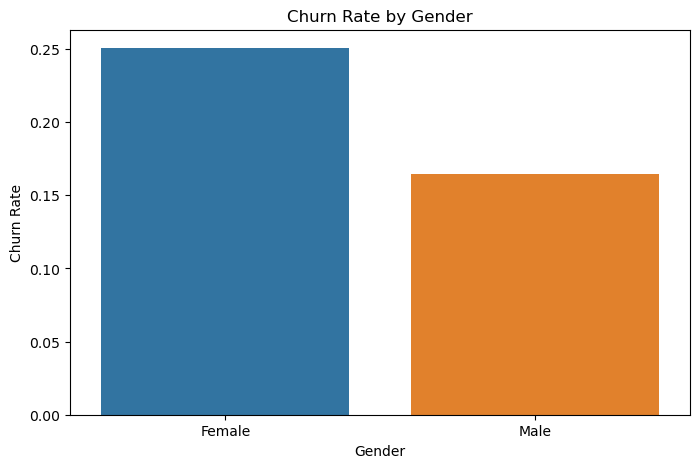

In [26]:
# Bar plot for churn by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_churn.index, y=gender_churn.values)
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender')
plt.show()

# 4. Behavioral Analysis

Analyze the impact of customer behavior on churn.

- <b> Product and Services Usage: </b> Examine how the number of products (NumOfProducts) a customer uses affects their likelihood to churn.

In [28]:
# Churn by Number of Products
prod_churn = df.groupby('NumOfProducts')['Exited'].mean()
prod_churn

NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4    1.000000
Name: Exited, dtype: float64

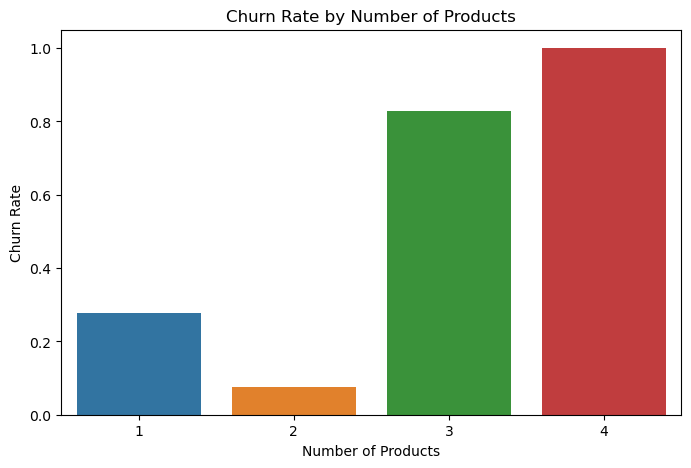

In [29]:
# Bar plot for churn by Number of Products
plt.figure(figsize=(8, 5))
sns.barplot(x=prod_churn.index, y=prod_churn.values)
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
plt.xlabel('Number of Products')
plt.show()

- <b> Activity Level Analysis: </b> Investigate the relationship between being an IsActiveMember and customer churn.

In [30]:
# Churn by Activity Level
active_churn = df.groupby('IsActiveMember')['Exited'].mean()
active_churn

IsActiveMember
0    0.268715
1    0.142691
Name: Exited, dtype: float64

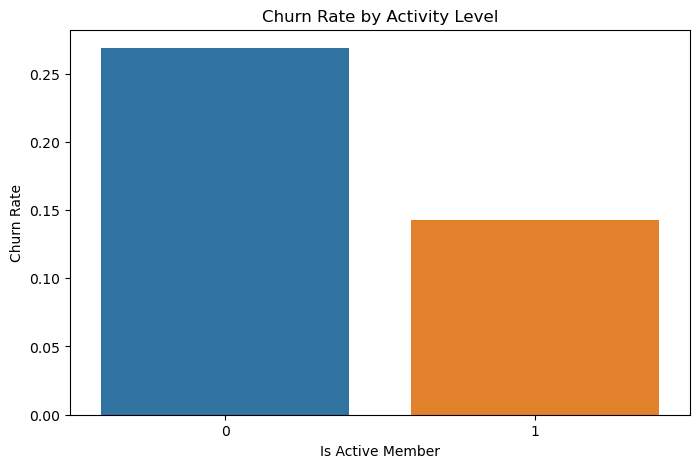

In [31]:
# Bar plot for churn by Activity Level
plt.figure(figsize=(8, 5))
sns.barplot(x=active_churn.index, y=active_churn.values)
plt.title('Churn Rate by Activity Level')
plt.ylabel('Churn Rate')
plt.xlabel('Is Active Member')
plt.show()

# 5. Financial Analysis

Investigate the financial aspects such as balance and credit card ownership.

- <b>Balance vs. Churn:</b> Analyze how customer balance levels correlate with churn rates.

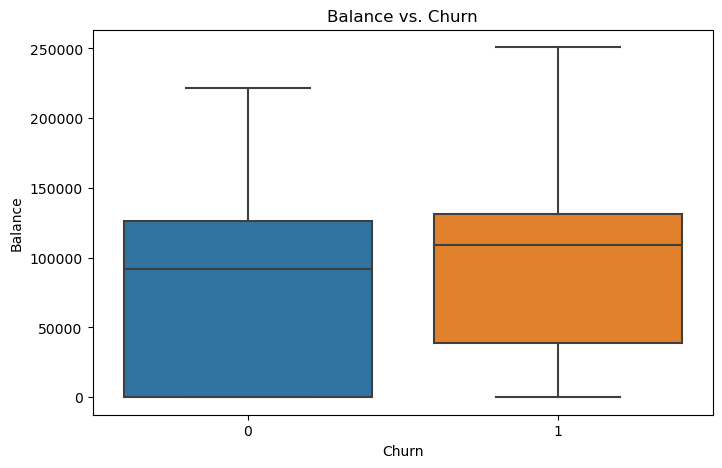

In [32]:
# Balance vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs. Churn')
plt.ylabel('Balance')
plt.xlabel('Churn')
plt.show()

- <b> Credit Card Ownership: </b> Determine if owning a credit card (HasCrCard) impacts customer loyalty.

In [33]:
# Credit Card Ownership vs. Churn
card_churn = df.groupby('HasCrCard')['Exited'].mean()
card_churn

HasCrCard
0    0.208149
1    0.201984
Name: Exited, dtype: float64

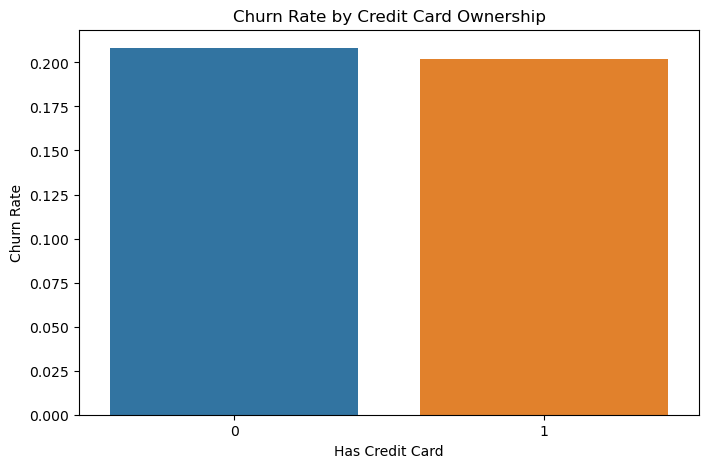

In [34]:
# Bar plot for churn by Credit Card Ownership
plt.figure(figsize=(8, 5))
sns.barplot(x=card_churn.index, y=card_churn.values)
plt.title('Churn Rate by Credit Card Ownership')
plt.ylabel('Churn Rate')
plt.xlabel('Has Credit Card')
plt.show()

# 6. Customer Satisfaction and Feedback

Analyze how complaints and satisfaction scores affect churn.

- <b> Complaint Analysis: </b> Study the impact of having a complaint (Complain) on customer churn.

In [35]:
# Complaint Analysis
complaint_churn = df.groupby('Complain')['Exited'].mean()
complaint_churn

Complain
0    0.000503
1    0.995108
Name: Exited, dtype: float64

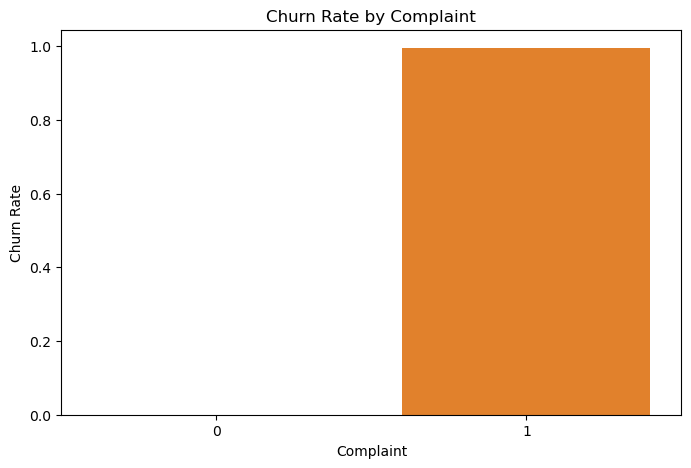

In [36]:
# Bar plot for churn by Complaint
plt.figure(figsize=(8, 5))
sns.barplot(x=complaint_churn.index, y=complaint_churn.values)
plt.title('Churn Rate by Complaint')
plt.ylabel('Churn Rate')
plt.xlabel('Complaint')
plt.show()

- <b> Satisfaction and Churn:</b> Explore how the Satisfaction Score relates to churn, especially among those who have filed complaints.

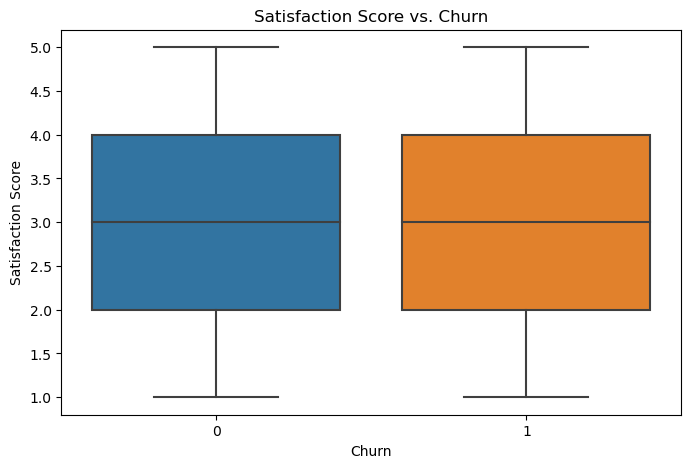

In [37]:
# Satisfaction Score vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Satisfaction Score', data=df)
plt.title('Satisfaction Score vs. Churn')
plt.ylabel('Satisfaction Score')
plt.xlabel('Churn')
plt.show()

# 7. Card Usage Analysis

Examine the impact of card type and loyalty points on churn.

- <b> Impact of Card Type on Churn:</b> Examine if different Card Types have different churn rates.

In [38]:
# Card Type vs. Churn
card_type_churn = df.groupby('Card Type')['Exited'].mean()
card_type_churn

Card Type
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64

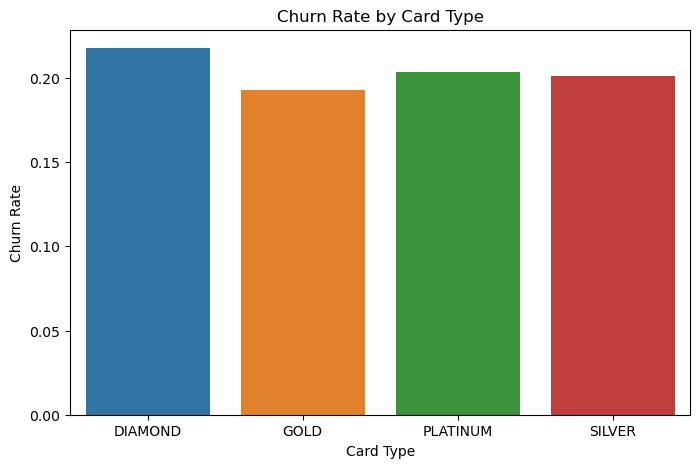

In [39]:
# Bar plot for churn by Card Type
plt.figure(figsize=(8, 5))
sns.barplot(x=card_type_churn.index, y=card_type_churn.values)
plt.title('Churn Rate by Card Type')
plt.ylabel('Churn Rate')
plt.xlabel('Card Type')
plt.show()

- <b> Loyalty Points Analysis:</b> Investigate whether Points Earned from credit card usage influence customer retention.

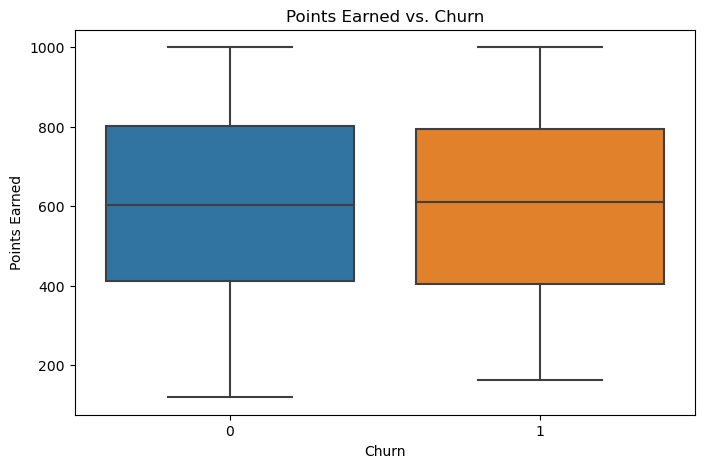

In [41]:
# Points Earned vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Point Earned', data=df)
plt.title('Points Earned vs. Churn')
plt.ylabel('Points Earned')
plt.xlabel('Churn')
plt.show()

# 8. Salary Analysis

Analyze the relationship between estimated salary and churn.

- <b> Salary and Churn:</b> Analyze the relationship between EstimatedSalary and customer churn, focusing on how financial well-being might influence churn decisions.

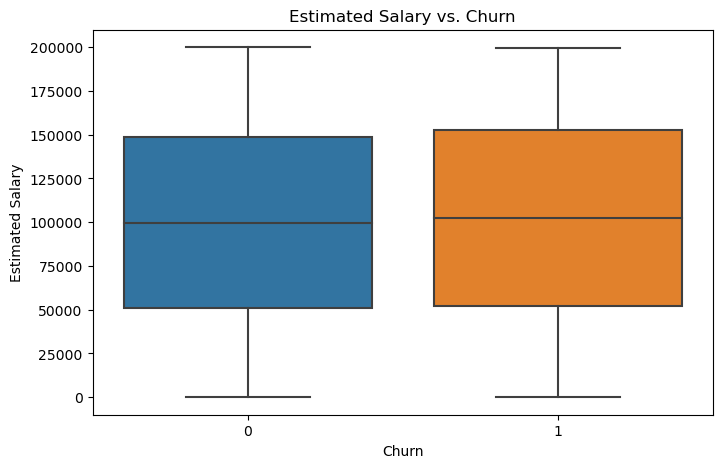

In [42]:
# Salary vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs. Churn')
plt.ylabel('Estimated Salary')
plt.xlabel('Churn')
plt.show()

# 9. Insights and Recommendation

# Key Insights:
1. Customers with lower credit scores are more likely to churn.
2. Churn rates vary significantly by geography, with certain regions exhibiting higher churn.
3. Gender differences in churn rates are noticeable, with one gender having a higher propensity to churn.
4. Customers with fewer products and those who are not active members are more likely to churn.
5. Lower balances and not owning a credit card are associated with higher churn rates.
6. Customers with complaints and lower satisfaction scores are more likely to churn.
7. Card type and loyalty points have an impact on churn rates.
8. Estimated salary is related to churn, with lower salary customers more likely to leave.

# Recommendations:
1. Improve customer engagement by offering personalized products and services.
2. Address regional disparities by understanding and addressing specific needs of customers in high-churn regions.
3. Implement targeted retention strategies for higher risk demographics.
4. Enhance customer satisfaction by resolving complaints efficiently and improving service quality.
5. Develop loyalty programs that reward higher balances and multiple product holdings.
6. Use predictive analytics to identify at-risk customers early and intervene with tailored retention offers.
